In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings

warnings.filterwarnings('ignore')
plt.rc('font', family='AppleGothic')

In [32]:
dataPath = '../../data/'
df = pd.read_csv('./data/31_0.9(2010-2059).csv', encoding='utf-8')
use_cols = ['총인구수(명)', '유치원 수', '초등학교 수', '출생건수', '사망건수', '혼인건수', '이혼건수', '학령인구(명)']

In [33]:
df

,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),행정구역
0,강원특별자치도,강릉시,2010,218503.000000,40.000000,35.000000,1641.000000,1413.000000,1071.000000,487.000000,43102.0,강원특별자치도 강릉시
1,강원특별자치도,강릉시,2011,217571.000000,40.000000,35.000000,1671.000000,1434.000000,1140.000000,496.000000,41960.0,강원특별자치도 강릉시
2,강원특별자치도,강릉시,2012,217741.000000,40.000000,35.000000,1636.000000,1490.000000,1107.000000,475.000000,41589.0,강원특별자치도 강릉시
3,강원특별자치도,강릉시,2013,216806.000000,40.000000,35.000000,1460.000000,1471.000000,1026.000000,528.000000,40758.0,강원특별자치도 강릉시
4,강원특별자치도,강릉시,2014,215807.000000,41.000000,35.000000,1298.000000,1539.000000,983.000000,473.000000,39345.0,강원특별자치도 강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...
11145,충청북도,충주시,2055,165707.834899,31.367673,19.689690,115.969320,349232.845468,252.328322,255.383084,9503.0,충청북도 충주시
11146,충청북도,충주시,2056,164877.655949,31.333013,19.655030,108.669320,409198.483307,243.977966,251.698068,9191.0,충청북도 충주시
11147,충청북도,충주시,2057,164051.614936,30.404674,19.655030,103.232319,479464.909223,236.562270,247.978392,8890.0,충청북도 충주시
11148,충청북도,충주시,2058,163230.633878,30.404674,18.726691,96.869320,561779.368880,229.111915,244.293376,8599.0,충청북도 충주시


In [34]:
df['행정구역'].value_counts()

행정구역
강원특별자치도 강릉시    50
인천광역시 남동구      50
서울특별시 은평구      50
서울특별시 종로구      50
서울특별시 중구       50
               ..
경상북도 영양군       50
경상북도 영주시       50
경상북도 영천시       50
경상북도 예천군       50
충청북도 충주시       50
Name: count, Length: 223, dtype: int64

In [35]:
# 데이터 전처리
scaler = MinMaxScaler()
df[use_cols] = scaler.fit_transform(df[use_cols])

In [36]:
def invTransform(scaler, data, colName, colNames):
    dummy = pd.DataFrame(np.zeros((len(data), len(colNames))), columns=colNames)
    dummy[colName] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=colNames)
    return dummy[colName].values

In [37]:
# MAPE 계산 함수
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [38]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_model31_0.99.h5')

In [39]:
prediction = df[df['연도'].isin([i for i in range(2020, 2060)])]

In [40]:
prediction

,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),행정구역
10,강원특별자치도,강릉시,2020,0.037224,0.052707,0.093248,0.004972,0.000034,4.525225e-09,0.087375,0.068376,강원특별자치도 강릉시
11,강원특별자치도,강릉시,2021,0.037159,0.052707,0.093248,0.004669,0.000034,4.513898e-09,0.088433,0.065861,강원특별자치도 강릉시
12,강원특별자치도,강릉시,2022,0.036871,0.052707,0.096039,0.004674,0.000042,3.902228e-09,0.085259,0.062779,강원특별자치도 강릉시
13,강원특별자치도,강릉시,2023,0.036705,0.054171,0.098830,0.004402,0.000042,3.862583e-09,0.085048,0.060113,강원특별자치도 강릉시
14,강원특별자치도,강릉시,2024,0.036473,0.052707,0.101621,0.004187,0.000044,3.471794e-09,0.083144,0.057583,강원특별자치도 강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...
11145,충청북도,충주시,2055,0.028559,0.044461,0.050512,0.000607,0.007255,1.417762e-09,0.053606,0.020917,충청북도 충주시
11146,충청북도,충주시,2056,0.028408,0.044410,0.050416,0.000569,0.008501,1.370469e-09,0.052827,0.020225,충청북도 충주시
11147,충청북도,충주시,2057,0.028257,0.043051,0.050416,0.000540,0.009961,1.328469e-09,0.052040,0.019557,충청북도 충주시
11148,충청북도,충주시,2058,0.028108,0.043051,0.047824,0.000507,0.011672,1.286274e-09,0.051260,0.018911,충청북도 충주시


In [41]:
# 시퀀스 데이터 생성
def create_sequence_data_for_prediction(data, sequence_length):
    sequences = []
    regions = []
    year = []
    for region in data['행정구역'].unique().tolist():
        temp_df = data[data['행정구역'] == region]
        if len(temp_df) < sequence_length:
            continue

        year.extend([i for i in range(2023, 2060+1)])
        temp_df = temp_df[use_cols]
        for i in range(len(temp_df) - sequence_length+1):
            regions.append(region)
            seq = temp_df[i:i+sequence_length]
            sequences.append(seq)
    return np.array(sequences), np.array(regions), np.array(year)

In [42]:
X_sequences, r, y = create_sequence_data_for_prediction(prediction, sequence_length = 3)

In [43]:
X_sequences

array([[[3.72242822e-02, 5.27073214e-02, 9.32476048e-02, ...,
         4.52522520e-09, 8.73750543e-02, 6.83760115e-02],
        [3.71594902e-02, 5.27073214e-02, 9.32476048e-02, ...,
         4.51389798e-09, 8.84328637e-02, 6.58614858e-02],
        [3.68712023e-02, 5.27073214e-02, 9.60388693e-02, ...,
         3.90222799e-09, 8.52594356e-02, 6.27788061e-02]],

       [[3.71594902e-02, 5.27073214e-02, 9.32476048e-02, ...,
         4.51389798e-09, 8.84328637e-02, 6.58614858e-02],
        [3.68712023e-02, 5.27073214e-02, 9.60388693e-02, ...,
         3.90222799e-09, 8.52594356e-02, 6.27788061e-02],
        [3.67054004e-02, 5.41714136e-02, 9.88301338e-02, ...,
         3.86258271e-09, 8.50478737e-02, 6.01133645e-02]],

       [[3.68712023e-02, 5.27073214e-02, 9.60388693e-02, ...,
         3.90222799e-09, 8.52594356e-02, 6.27788061e-02],
        [3.67054004e-02, 5.41714136e-02, 9.88301338e-02, ...,
         3.86258271e-09, 8.50478737e-02, 6.01133645e-02],
        [3.64731685e-02, 5.27073214e

In [44]:
r

array(['강원특별자치도 강릉시', '강원특별자치도 강릉시', '강원특별자치도 강릉시', ..., '충청북도 충주시',
       '충청북도 충주시', '충청북도 충주시'], dtype='<U12')

In [45]:
X_sequences[1]

array([[3.71594902e-02, 5.27073214e-02, 9.32476048e-02, 4.66855206e-03,
        3.43255176e-05, 4.51389798e-09, 8.84328637e-02, 6.58614858e-02],
       [3.68712023e-02, 5.27073214e-02, 9.60388693e-02, 4.67378586e-03,
        4.20134362e-05, 3.90222799e-09, 8.52594356e-02, 6.27788061e-02],
       [3.67054004e-02, 5.41714136e-02, 9.88301338e-02, 4.40162812e-03,
        4.24289994e-05, 3.86258271e-09, 8.50478737e-02, 6.01133645e-02]])

In [46]:
# 예측
predicted_data = best_model.predict(X_sequences)

265/265 [==============================] - 1s 2ms/step


In [47]:
predicted_data = invTransform(scaler, predicted_data, '학령인구(명)', use_cols).reshape(-1, 1)


In [48]:
predicted_data.round()


array([[27734.],
       [26716.],
       [25644.],
       ...,
       [ 9572.],
       [ 9290.],
       [ 9004.]])

In [49]:
predicted_df = pd.DataFrame({'연도': y, '행정구역': r, '학령인구(명)': predicted_data.round().flatten()})

In [50]:
predicted_df['시도'] = predicted_df['행정구역'].apply(lambda x: x.split()[0])

In [51]:
predicted_df['시도'].unique()

array(['강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

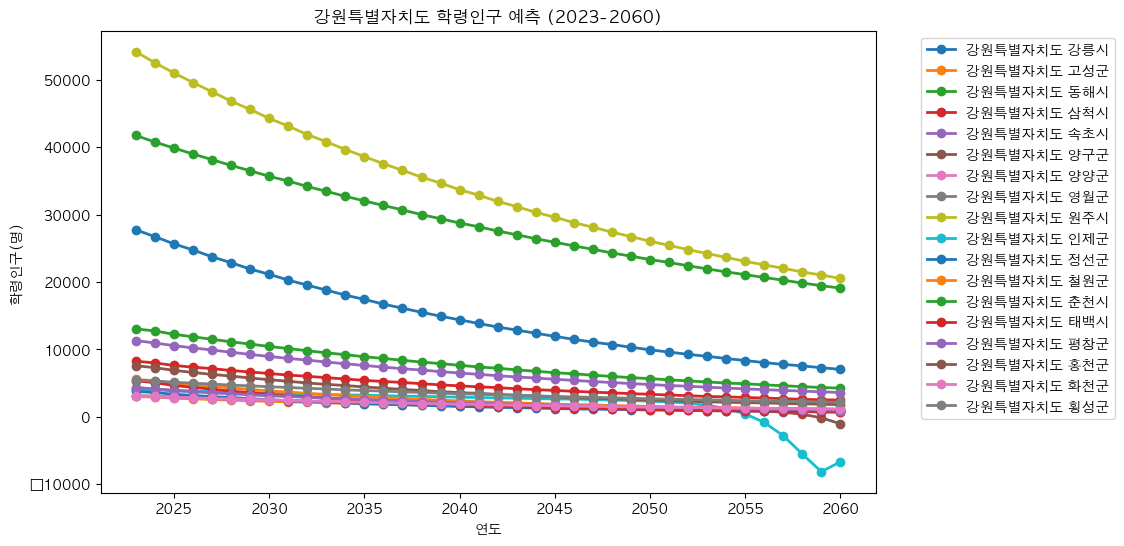

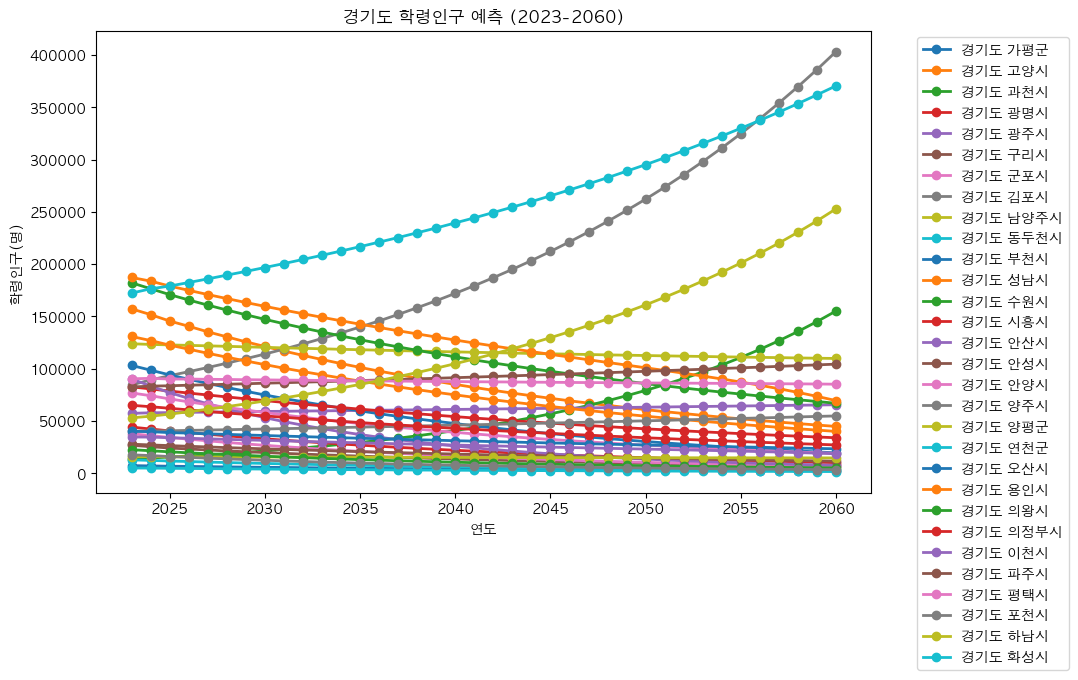

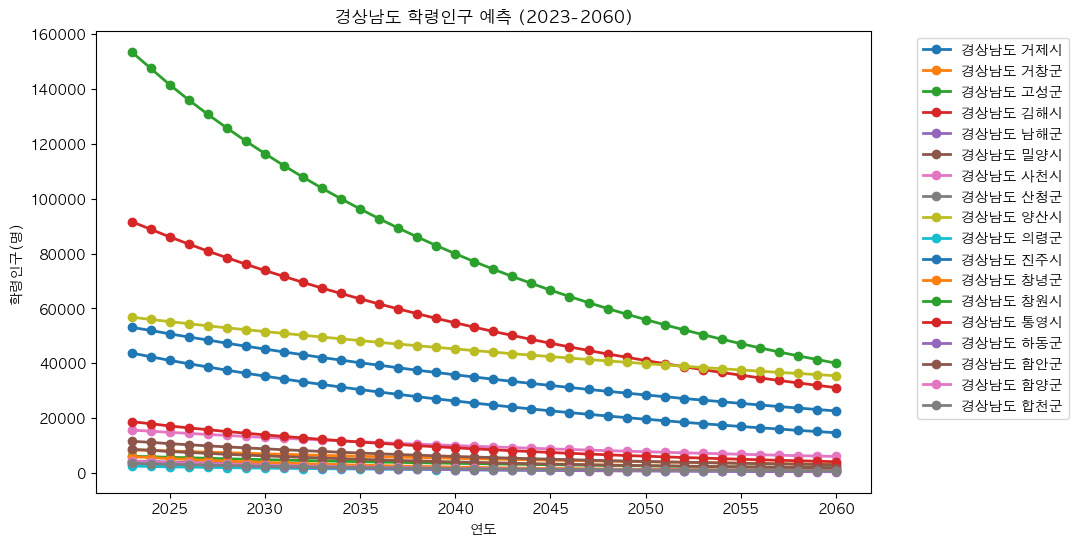

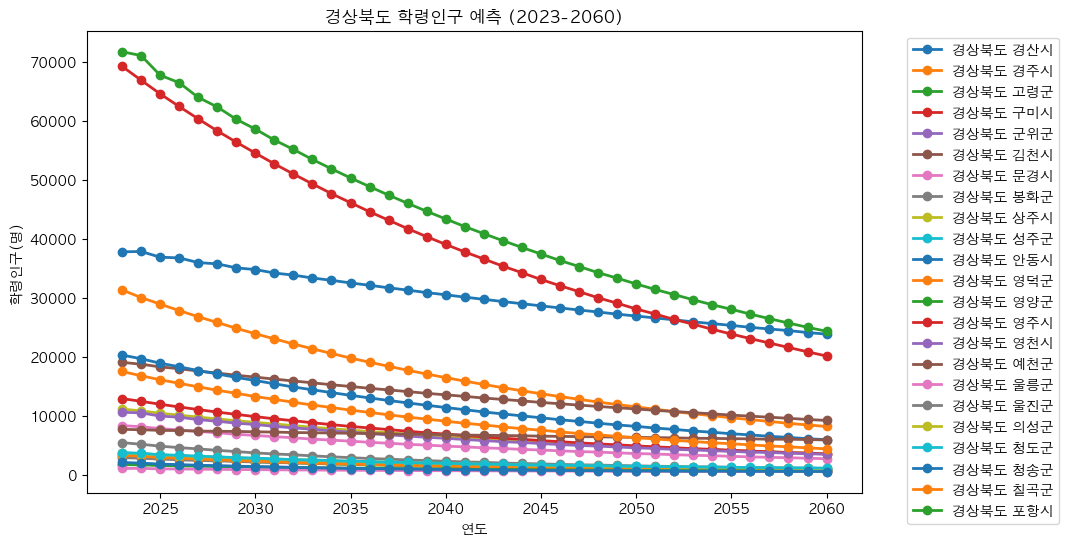

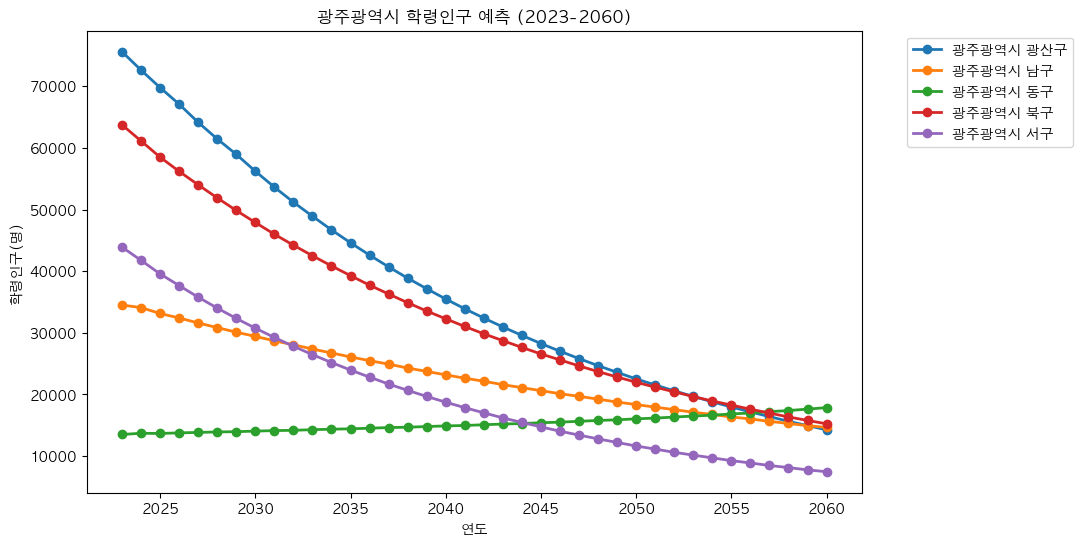

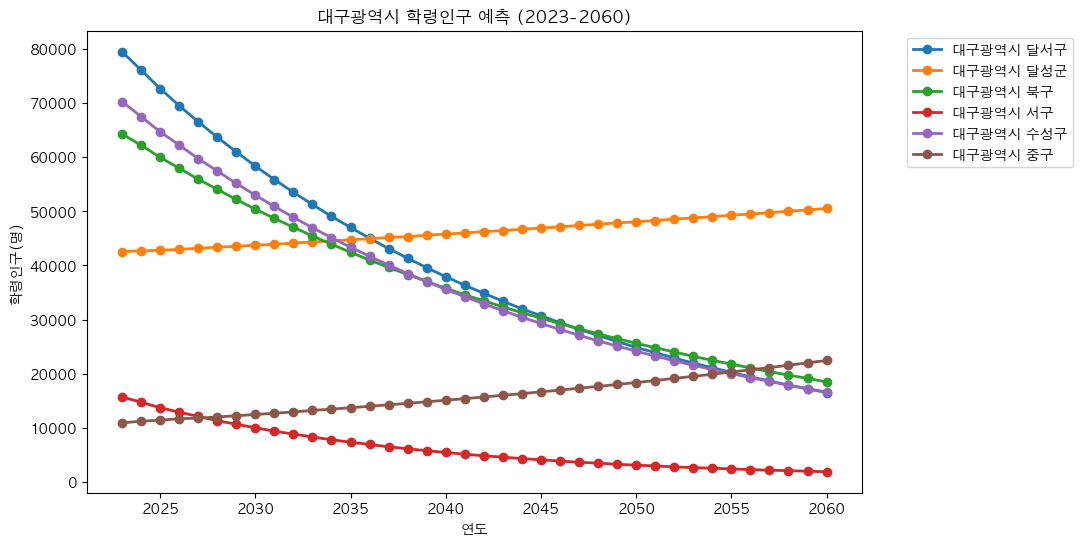

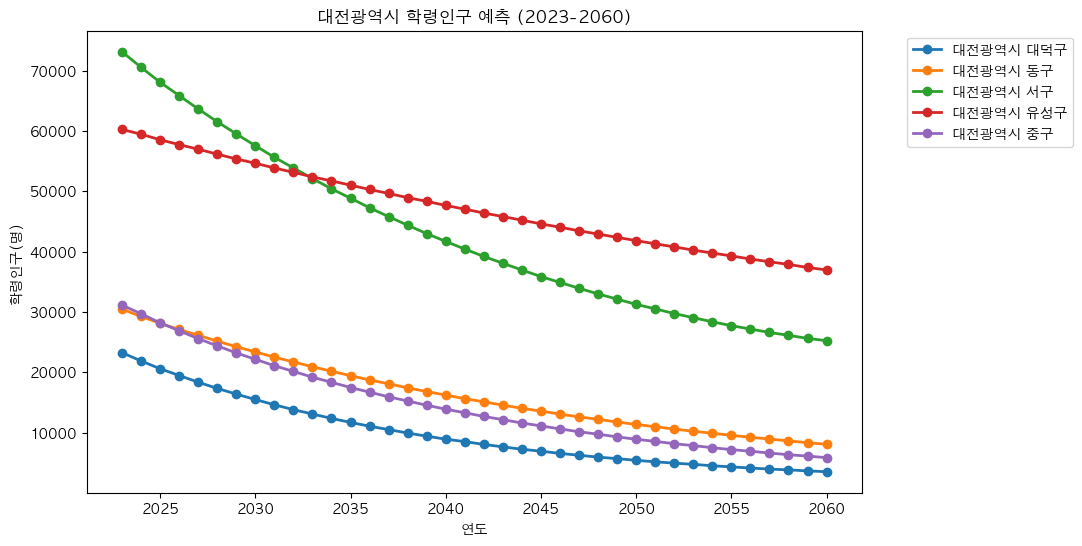

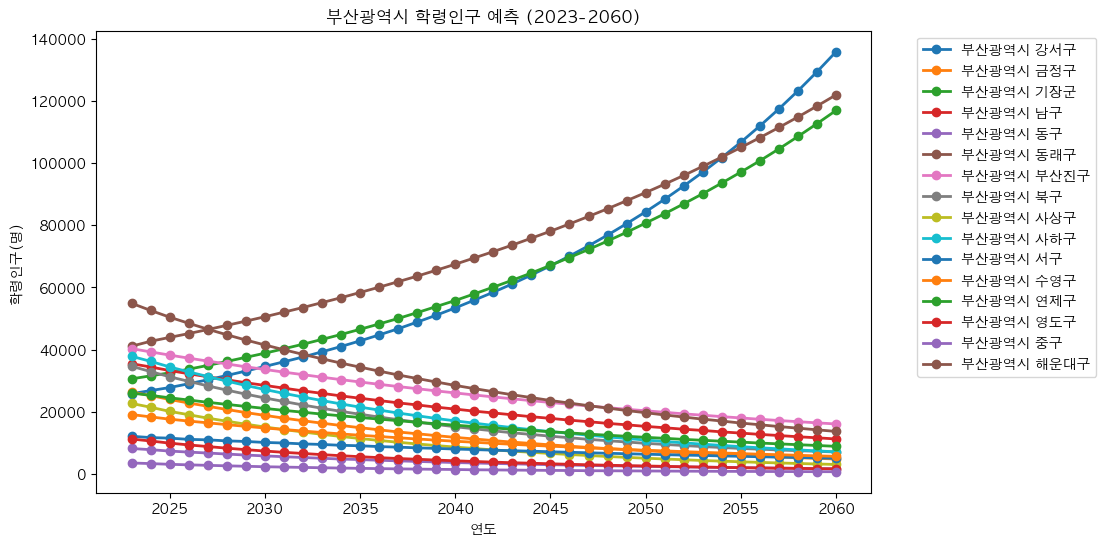

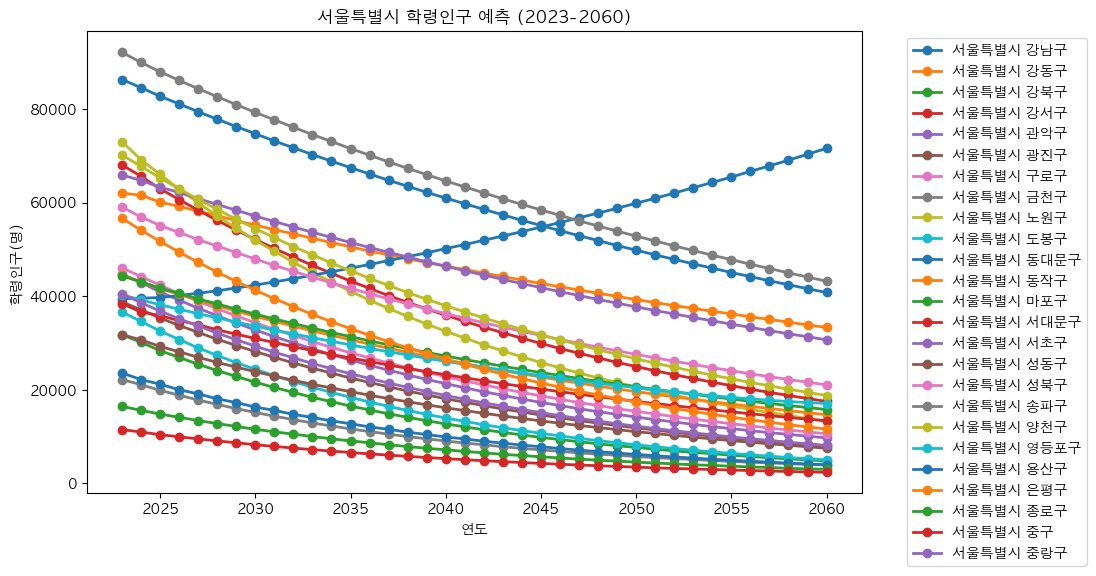

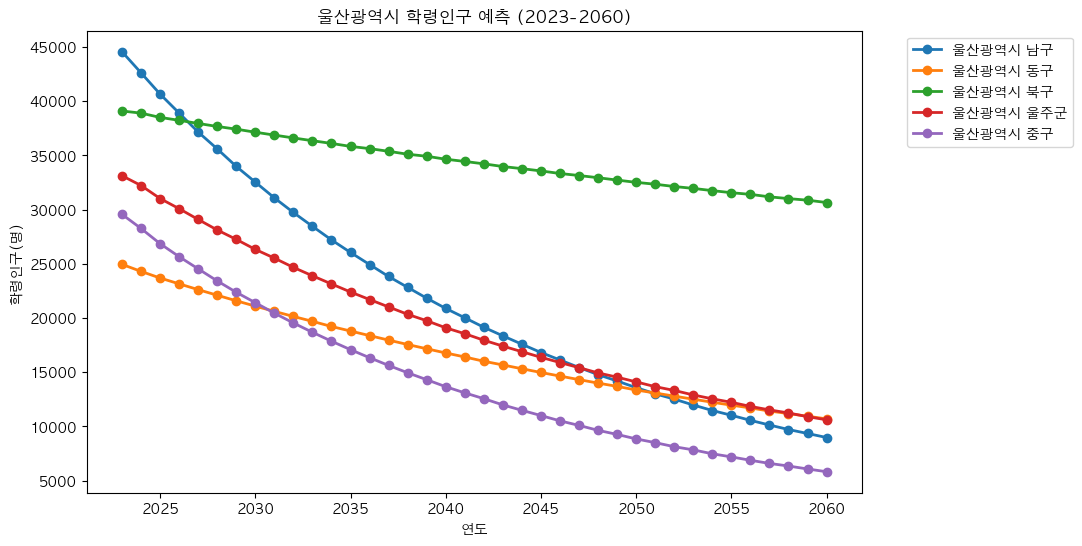

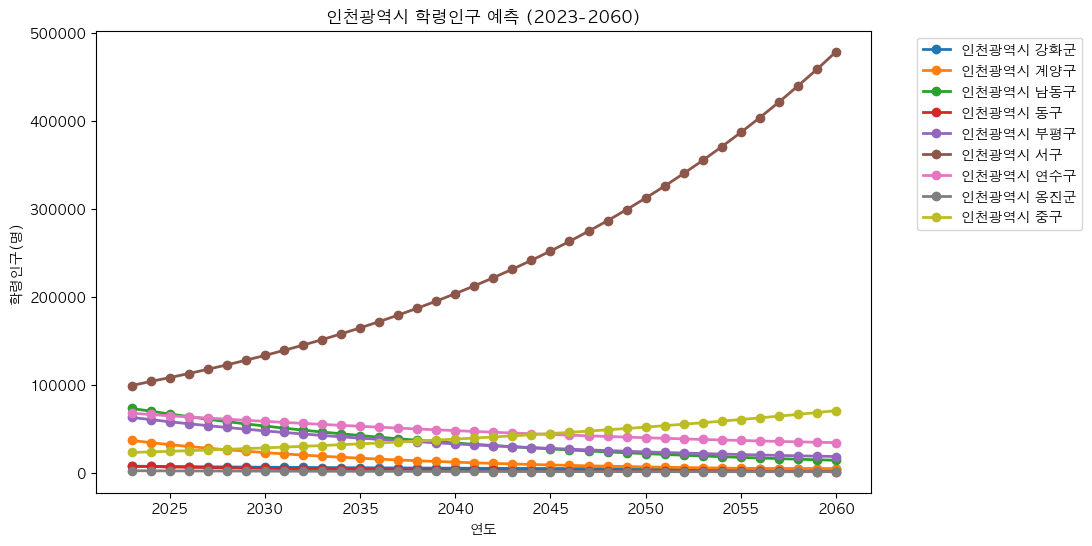

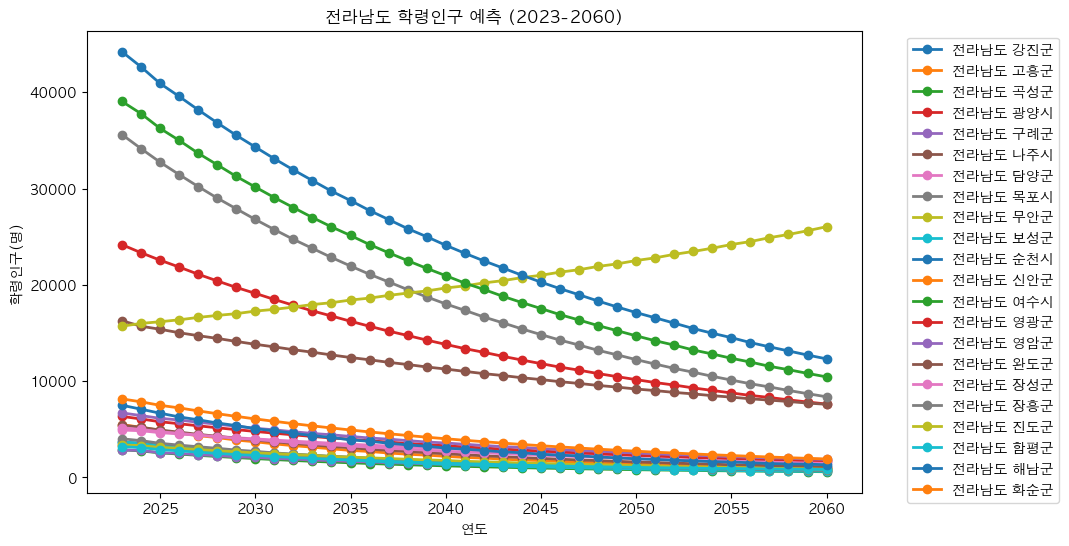

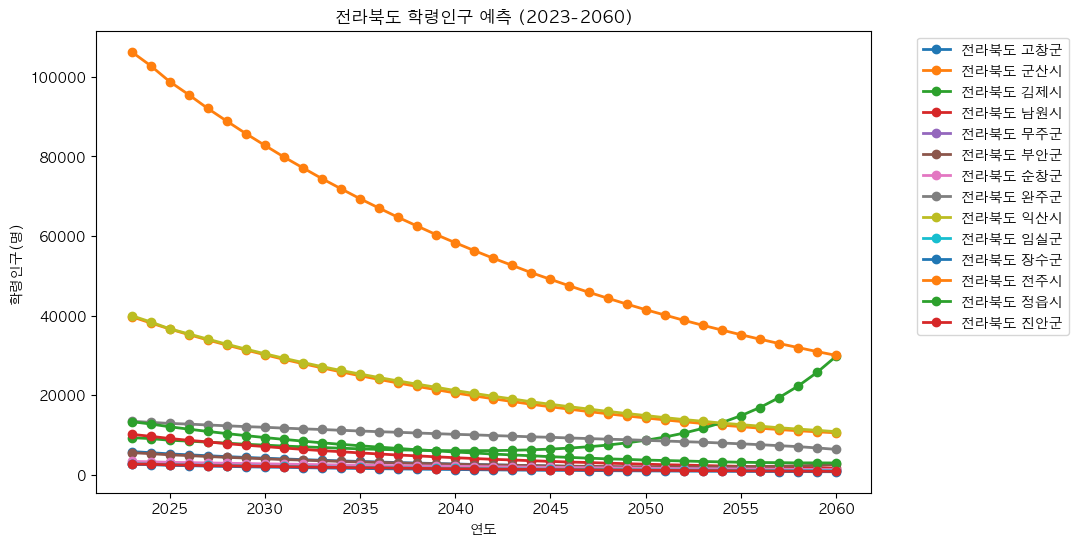

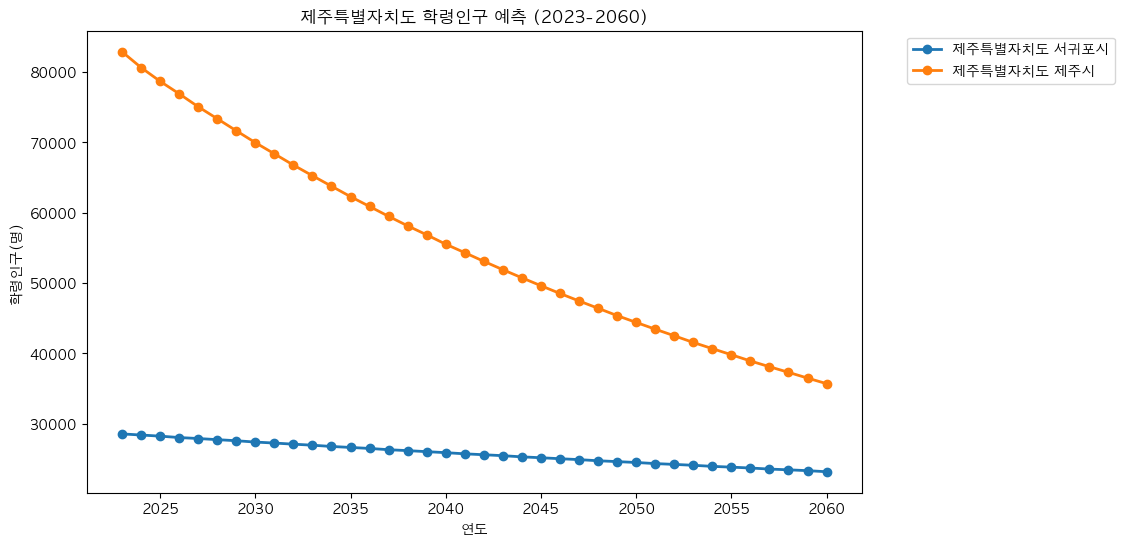

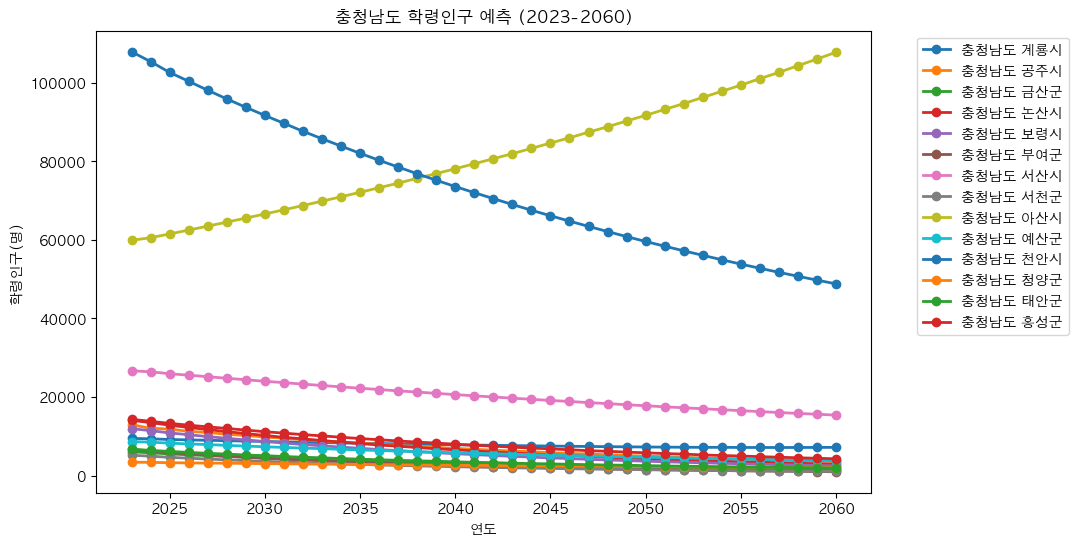

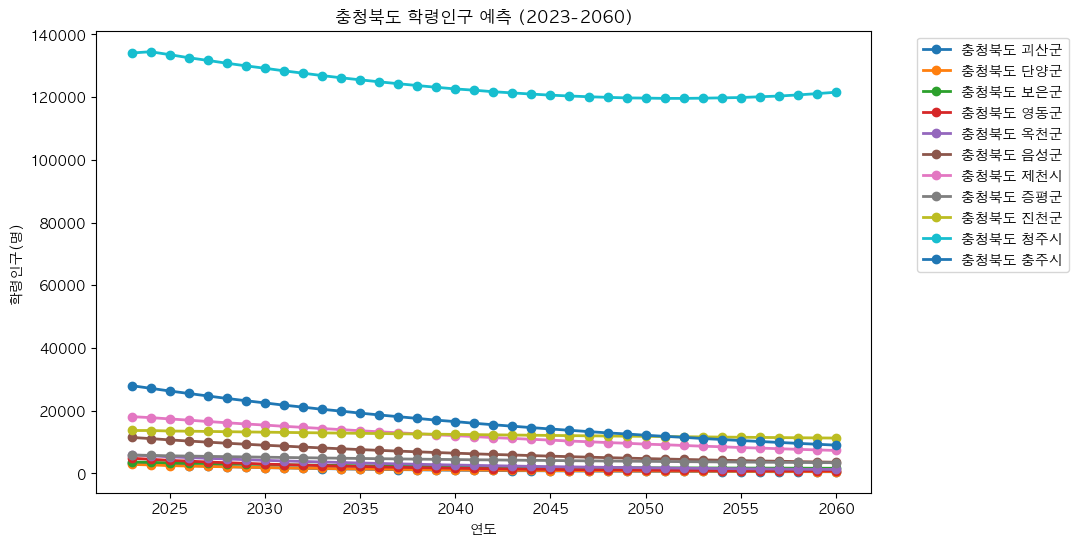

In [53]:
for sido in predicted_df['시도'].unique().tolist():
    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Iterate through each region
    for region in predicted_df[predicted_df['시도'] == sido]['행정구역'].unique().tolist():
        temp_df = predicted_df[predicted_df['행정구역'] == region]
        plt.plot(temp_df['연도'], temp_df['학령인구(명)'], label=region, marker='o', linestyle='-', linewidth=2)

    # Add labels and title
    plt.xlabel('연도')
    plt.ylabel('학령인구(명)')
    plt.title(f'{sido} 학령인구 예측 (2023-2060)')

    # Add legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Display the plot
    plt.show()
